In [228]:
import pandas as pd
import os
import io
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from google.colab import files 
file = files.upload()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')




Saving test.csv to test (16).csv
Saving train.csv to train (18).csv


In [229]:
df_list= [train, test]
df=pd.concat(df_list)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [230]:
number_of_train_dataset = df.Survived.notnull().sum()
number_of_train_dataset

891

In [231]:
number_of_test_dataset = df.Survived.isnull().sum() 
number_of_test_dataset

418

In [232]:
y_true = df.pop("Survived")[:number_of_train_dataset]
y_true

0     0.00
1     1.00
2     1.00
3     1.00
4     0.00
      ... 
886   0.00
887   1.00
888   0.00
889   1.00
890   0.00
Name: Survived, Length: 891, dtype: float64

In [233]:
df.head(2).T


,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.00,38.00
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.28
Cabin,NaN,C85


In [234]:
pd.options.display.float_format = '{:.2f}'.format
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [235]:
df[df["Age"].notnull()].groupby(
     ["Sex"])["Age"].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [236]:
df[df["Age"].notnull()].groupby(
     ["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [237]:
df["Age"].fillna(
 df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [238]:
df.head(62)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
57,58,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.23,NaN,C
58,59,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.75,NaN,S
59,60,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.90,NaN,S
60,61,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.23,NaN,C


In [239]:
df.loc[61,"Embarked"] = "S"
df.loc[829,"Embarked"] = "S"

In [240]:
df.head(62)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
57,58,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.23,NaN,C
58,59,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.75,NaN,S
59,60,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.90,NaN,S
60,61,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.23,NaN,C


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


In [242]:
object_columns = ["PassengerId", "Pclass", "Name","Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)

df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [243]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)


In [244]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
              df["Pclass"], prefix="Pclass"), on=None, index=True) 
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
              df["Embarked"], prefix="Embarked"), on=None, index=True)


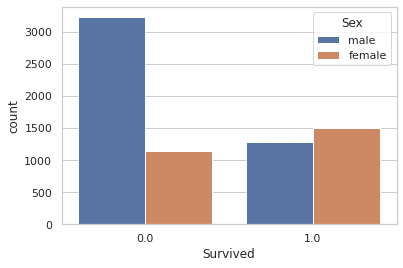

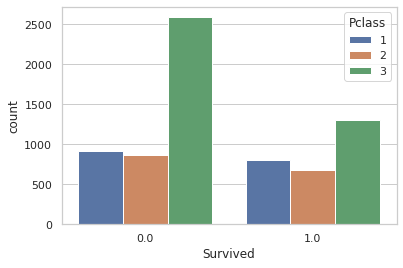

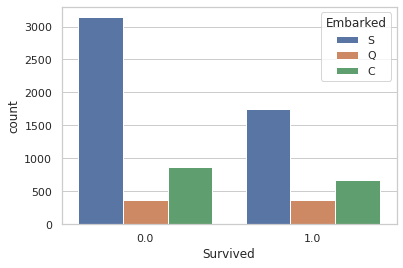

In [245]:
temp_columns = ["Sex", "Pclass", "Embarked"]
for col_name in temp_columns:
  temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
  sns.countplot(x="Survived", hue=col_name, data=temp_df)
  plt.show()

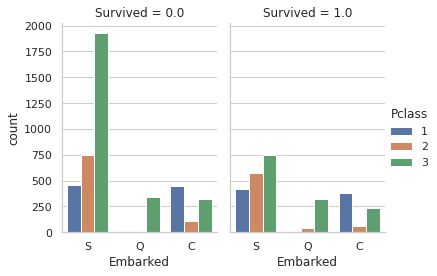

In [246]:
temp_df = pd.merge(one_hot_df[temp_columns], 
                   y_true, left_index=True, 
                   right_index=True)
g = sns.catplot(x="Embarked", 
                hue="Pclass", 
                col="Survived",
                data=temp_df, 
                kind="count",
                height=4, aspect=.7);


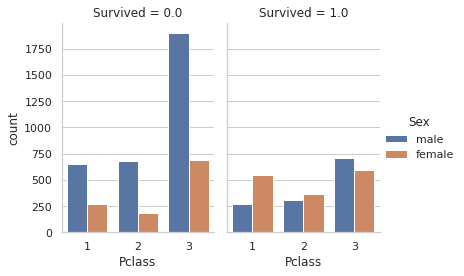

In [247]:
temp_df = pd.merge(
    one_hot_df[temp_columns], 
    y_true, left_index=True, 
    right_index=True)
g = sns.catplot(x="Pclass", 
                hue="Sex", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)


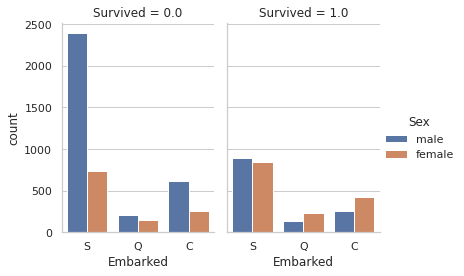

In [248]:
temp_df = pd.merge(
    one_hot_df[temp_columns], 
    y_true, left_index=True, 
    right_index=True)
g = sns.catplot(
    x="Embarked", hue="Sex", 
    col="Survived",
    data=temp_df, kind="count",
    height=4, aspect=.7);


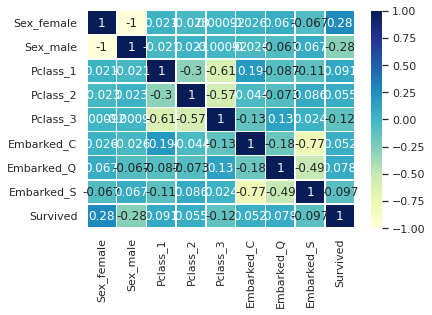

In [249]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
    if col_name.split("_")[0] in temp_columns and "_" in col_name ] + ["Sex"]

temp_df = pd.merge(one_hot_df[crosscheck_columns],     y_true, left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")